# i. Introduction

- Nama  : Muhammad Zhafir Abdurrahman
- Batch : RMT-049


Berikut URL Dashboard : https://public.tableau.com/app/profile/muhammad.zhafir.abdurrahman/viz/Book1_17623587428560/Dashboard1?publish=yes&showOnboarding=true

# ii. Problem Statement and Dataset Description

### Topik Permasalahan

Analisis performa penjualan dan perilaku pelanggan pada platform e-commerce Formee Outfit pada tahun 2024

### Problem Statement

Metode SMART Framework untuk menendapatkan problem statement

- Specific      : Menidentifikasi faktor yang dapat meningkatkan penjualan
- Measurable    : Meningkatkan Total produk diklik sebesar 15%
- Achievable    : Optimas halaman produk, penyesuaian strategi promosi
- Relevant      : Meningkatkan total produk diklik akan meningkatkan konversi pesanan yang berdampak kepada peningkatan penjualan
- Time-bound    : Target akan dicapai dalam 3 bulan

Problem Statement : Toko Formee Outfit ingin  total penjualan dari klik halaman sebesar 15% dengan cara meningkatkan strategi promosi dan optimasi halaman toko, yang berdampak pada peningkatan sales revenue toko yang akan dicapai dalam waktu 3 bulan

Untuk memudahkan analisis dan menyelesaikan permasalahannya, saya akan membuat sebuah framework 5W+1H untuk menemukan akar permasalahannya, berikut penjabaran 5W+1H nya

- Apa faktor yang mempengaruhi total penjualan harian pada toko Formee Outfit?
- Mengapa perlu dilakukannya analisis penjualan berdasarkan penjualan harian?
- Siapa yang terlibat dalam data penjualan?
- Kapan periode waktu yang akan digunakan dalam analisis penjualan?
- Dari mana sumber data diambil?
- Bagaimana metode analisis yang dapat menjawab permasalahan ini?

### Latar Belakang

Industri e-commerce di Indonesia sedang mengalami trend kenaikan dalam beberapa tahun terakhir, namun dengan kenaikan ini terjadi persaingan yang ketat antar toko sehingga dibutuhkan sebuah strategi agar dapat bersaing dengan toko lain, oleh sebab itu dibutuhkan pemahaman mengenai pola penjualan dan perilaku pelanggan secara baik. Formee Outfit sebagai salah satu pelaku usaha di platform e-commerce Shopee mengalami fluktuasi penjualan tiap bulan selama tahun 2024. Hal ini dapat dilihat dari jumlah pengunjung, konversi pesanan dan pembelian berulang sebagai indikator untuk menilai efektivitas strategi dan retensi pelanggan.

### Sumber Dataset

Dataset yang akan digunakan berasal dari internal dashboard e-commerce Formee Outfit. Data dikumpulkan secara otomatis oleh sistem platform sebagai laporan bulanan dalam format xlsx, yang berisi data penjualan perharinya dalam satu bulan sehingga data yang berhasil dikumpulkan sebanyak 366 hari dengan 16 column variabel.

### Penjabaran Masalah

Untuk menjawab problem statement di atas akan dilakukan analasis statistik deskriptif dan statistik inferensial, statistik deskriptif akan mencari tahu rata-rata, median dan standar deviasi pada penjualan dan total produk diklik pada tiap bulannya untuk mengidentifikasi bulan dengan penjualan tertinggi dan terendah pada tahun 2024 yang akan ditunjukkan dengan visualisasi data. Sedangkan untuk statistik inferensial dilakukan untuk mencari korelasi pada jumlah pengunjung dengan total penjualan

# iii. Data Loading

In [ ]:
# Melakukan data loading dari data formee_shop_stats
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('P0M1_muhammad_zhafir_abdurrahman_dataset.xlsx')

## Data Exploration

In [121]:
df.head()

,Tanggal,Total Penjualan (IDR),Total Pesanan,Penjualan per Pesanan,Produk Diklik,Total Pengunjung,Tingkat Konversi Pesanan,Pesanan Dibatalkan,Penjualan Dibatalkan,Pesanan Dikembalikan,Penjualan Dikembalikan,Pembeli,Total Pembeli Baru,Total Pembeli Saat Ini,Total Potensi Pembeli,Tingkat Pembelian Berulang
0,01-01-2024,4.524.933,34,"133.086,26",3640,2628,"0,93%",4,662.727,0,0.0,32,29,3,295,"6,25%"
1,02-01-2024,2.031.584,16,"126.974,00",2910,2297,"0,55%",2,267.610,0,0.0,16,15,1,272,"0,00%"
2,03-01-2024,2.184.868,15,"145.657,87",2973,3065,"0,50%",1,100.990,0,0.0,15,14,1,272,"0,00%"
3,04-01-2024,4.916.046,11,"446.913,27",2910,2392,"0,38%",1,1.851.000,0,0.0,10,6,4,330,"10,00%"
4,05-01-2024,2.083.797,17,"122.576,29",2690,2175,"0,63%",0,0,0,0.0,17,16,1,341,"0,00%"


Dari tabel di atas diketahui bahwa tabel tersebut berisi 16 column yang hampir seluruh datanya bersifat numeric. Berdasarkan column Tingkat Konversi Pesanan dapat diketahui bahwa persenannya sangat kecil (< 1%) sehingga potensi penjualan pada toko Formee Outfit tergolong cukup besar untuk ditingkatkan

In [122]:
df.dtypes

Tanggal                        object
Total Penjualan (IDR)          object
Total Pesanan                   int64
Penjualan per Pesanan          object
Produk Diklik                   int64
Total Pengunjung                int64
Tingkat Konversi Pesanan       object
Pesanan Dibatalkan              int64
Penjualan Dibatalkan           object
Pesanan Dikembalikan            int64
Penjualan Dikembalikan        float64
Pembeli                         int64
Total Pembeli Baru              int64
Total Pembeli Saat Ini          int64
Total Potensi Pembeli           int64
Tingkat Pembelian Berulang     object
dtype: object

Dari analisis tipe data menggunakan function dtypes diketahui bahwa masih ada tipe data yang salah diantaranya pada column Tanggal, Total Penjualan, Penjualan per Pesanan, Tingkat Konversi Pesanan dan Tingkat Pembelian berulang hal ini dapat terjadi dikarenakan adanya simbol yang menyebabkan data terbaca menjadi object (numeric+string), sehingga diperlukan proses perubahan tipe data menjadi float atau integer akan dilakukan pada tahapan selanjutnya.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tanggal                     366 non-null    object 
 1   Total Penjualan (IDR)       366 non-null    object 
 2   Total Pesanan               366 non-null    int64  
 3   Penjualan per Pesanan       366 non-null    object 
 4   Produk Diklik               366 non-null    int64  
 5   Total Pengunjung            366 non-null    int64  
 6   Tingkat Konversi Pesanan    366 non-null    object 
 7   Pesanan Dibatalkan          366 non-null    int64  
 8   Penjualan Dibatalkan        366 non-null    object 
 9   Pesanan Dikembalikan        366 non-null    int64  
 10  Penjualan Dikembalikan      366 non-null    float64
 11  Pembeli                     366 non-null    int64  
 12  Total Pembeli Baru          366 non-null    int64  
 13  Total Pembeli Saat Ini      366 non

Dari data yang didapat dengan menggunakan method .info diketahui summary yang menunjukkan bahwa tabel tersebut berisi 366 baris yang mewakili tanggal penjualan dan tidak memiliki nilai null, data ini sangat cukup untuk melakukan analisis selanjutnya dimana analisis akan dilakukan dengan data pada tahun 2024 (1 Januari 2024 - 31 Desember 2024)

# iv. Data Cleaning

Dataset ini tidak memiliki missing value, namun ada column yang tidak digunakan sehingga pada proses data cleaning dilakukan dengan mengubah tipe data pada column yang tidak konsisten tipe datanya dan melakukan drop column pada column yang tidak digunakan

In [124]:
df = df.drop(['Pesanan Dibatalkan', 'Penjualan Dibatalkan', 'Penjualan Dikembalikan', 'Total Potensi Pembeli', 'Pesanan Dikembalikan'], axis=1)

In [125]:
# Mengubah tipe data tanggal dari object menjadi datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')
# Menghilangkan '.' dan mengubah tipe datanya menjadi float pada column Total Penjualan
df['Total Penjualan (IDR)'] = df['Total Penjualan (IDR)'].str.replace('.','').astype(float)
# Menghilangkan '.', mengubah ',' menjadi '.' agar dapat merubah tipe datanya menjadi float pada column Penjualan per Pesanan 
df['Penjualan per Pesanan'] = df['Penjualan per Pesanan'].str.replace('.','').str.replace(',','.').astype(float)
# Menghilangkan '%' dan mengubah ',' menjadi '.' pada column Tingkat Konversi Pesanan dan mengubahnya menjadi float
df['Tingkat Konversi Pesanan'] = (df['Tingkat Konversi Pesanan'].str.replace('%', '').str.replace(',', '.').astype(float) / 100)
# Menghilangkan '%' dan mengubah ',' menjadi '.' pada column Tingkat Pembelian Berulang dan mengubahnya menjadi float
df['Tingkat Pembelian Berulang'] = (df['Tingkat Pembelian Berulang'].str.replace('%', '').str.replace(',', '.').astype(float) / 100)

print(df.dtypes)
df

Tanggal                       datetime64[ns]
Total Penjualan (IDR)                float64
Total Pesanan                          int64
Penjualan per Pesanan                float64
Produk Diklik                          int64
Total Pengunjung                       int64
Tingkat Konversi Pesanan             float64
Pembeli                                int64
Total Pembeli Baru                     int64
Total Pembeli Saat Ini                 int64
Tingkat Pembelian Berulang           float64
dtype: object


,Tanggal,Total Penjualan (IDR),Total Pesanan,Penjualan per Pesanan,Produk Diklik,Total Pengunjung,Tingkat Konversi Pesanan,Pembeli,Total Pembeli Baru,Total Pembeli Saat Ini,Tingkat Pembelian Berulang
0,2024-01-01,4524933.0,34,133086.26,3640,2628,0.0093,32,29,3,0.0625
1,2024-01-02,2031584.0,16,126974.00,2910,2297,0.0055,16,15,1,0.0000
2,2024-01-03,2184868.0,15,145657.87,2973,3065,0.0050,15,14,1,0.0000
3,2024-01-04,4916046.0,11,446913.27,2910,2392,0.0038,10,6,4,0.1000
4,2024-01-05,2083797.0,17,122576.29,2690,2175,0.0063,17,16,1,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,9449200.0,42,224980.95,10143,12684,0.0041,42,41,1,0.0000
362,2024-12-28,5406916.0,29,186445.38,9490,12047,0.0031,28,26,2,0.0357
363,2024-12-29,5088942.0,29,175480.76,10701,13322,0.0027,29,28,1,0.0000
364,2024-12-30,5475514.0,31,176629.48,8886,11375,0.0035,31,29,2,0.0000


Dari proses perubahan tipe data pada tabel tersebut dapat terlihat data numerical sudah menjadi integer dan float sehingga data dapat di analisis lebih lanjut

# v. Exploration and Analysis

Pada tahap ini akan dilakukan sebuah analysis untuk menjawab problem statement denga proses analysis berupa perhitungan statistik deskriptif dan statistik inferensial dan data tersebut akan di visualisasikan 

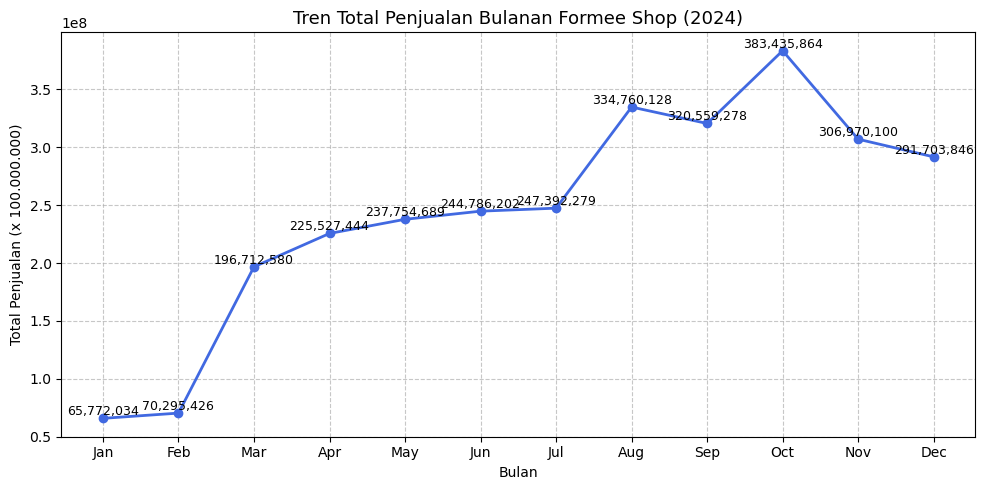

In [126]:
df["Bulan"] = df["Tanggal"].dt.strftime("%b")
bulan_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# Group berdasarkan bulan
monthly_sales = df.groupby("Bulan")["Total Penjualan (IDR)"].sum()

# Reindex agar urutan bulan sesuai dan isi yang kosong dengan 0
monthly_sales = monthly_sales.reindex(bulan_order, fill_value=0)

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_sales.index, 
    monthly_sales.values, 
    marker="o", 
    color="royalblue", 
    linewidth=2
)

# Tambahkan label nilai di atas tiap titik
for i, value in enumerate(monthly_sales.values):
    plt.text(
        i, value,                             # posisi teks
        f"{value:,.0f}",                      # format angka (misal 1,000,000)
        ha='center', va='bottom', fontsize=9, color='black'
    )

# Judul dan label sumbu
plt.title("Tren Total Penjualan Bulanan Formee Shop (2024)", fontsize=13)
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan (x 100.000.000)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks()
plt.tight_layout()
plt.show()

Dari grafik tren total penjulan menunjukkan adanya fluktiasi yang cenderung bersifat positif dimana adanya kenaikan tiap bulannya, penjualan terbesar berada pada bulan Oktober dengan total penjualan sebesar Rp 383.435.864 dan penjualan terendah berada di bulan Januari dengan penjualan sebesar Rp.65.772.034, hal ini dapat disebabkan karena adanya promosi dibulan dan ada event besar.

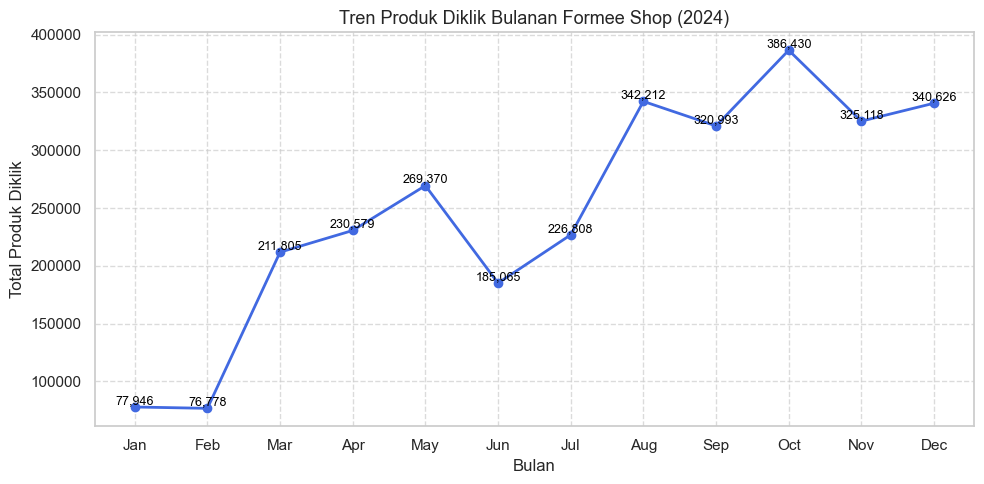

In [ ]:
monthly_click = df.groupby("Bulan")["Produk Diklik"].sum()

# Reindex agar urutan bulan sesuai dan isi yang kosong dengan 0
monthly_click = monthly_click.reindex(bulan_order, fill_value=0)

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_click.index, 
    monthly_click.values, 
    marker="o", 
    color="royalblue", 
    linewidth=2
)

# Tambahkan label nilai di atas tiap titik
for i, value in enumerate(monthly_click.values):
    plt.text(
        i, value,                             
        f"{value:,.0f}",                      
        ha='center', va='bottom', fontsize=9, color='black'
    )

# Judul dan label sumbu
plt.title("Tren Produk Diklik Bulanan Formee Shop (2024)", fontsize=13)
plt.xlabel("Bulan")
plt.ylabel("Total Produk Diklik")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks()
plt.tight_layout()
plt.show()

#### Statistik Deskriptif

Pada tahap ini akan dilakukan perhitungan central tendency (mean, median, skewness, kurtosis dan standar deviasinya) pada column Total Penjualan, Produk diklik, Pembeli Baru dan Pembeli Lama

In [127]:
print('Rata-rata total penjualan pada tahun 2024 :', df['Total Penjualan (IDR)'].mean())
print('Median pada total penjualan pada tahun 2024 :', df['Total Penjualan (IDR)'].median())
print('Skewness :', df['Total Penjualan (IDR)'].skew())
print('Kurtosis :', df['Total Penjualan (IDR)'].kurt())
print('Standar Deviasi :', df['Total Penjualan (IDR)'].std())
print('Range total penjualan pada tahun 2024: Rp',df['Total Penjualan (IDR)'].max() - df['Total Penjualan (IDR)'].min())

Rata-rata total penjualan pada tahun 2024 : 7993633.5245901635
Median pada total penjualan pada tahun 2024 : 8423327.5
Skewness : 0.46021207627966604
Kurtosis : 1.123227641824725
Standar Deviasi : 4117155.57265587
Range total penjualan pada tahun 2024: Rp 25874406.0


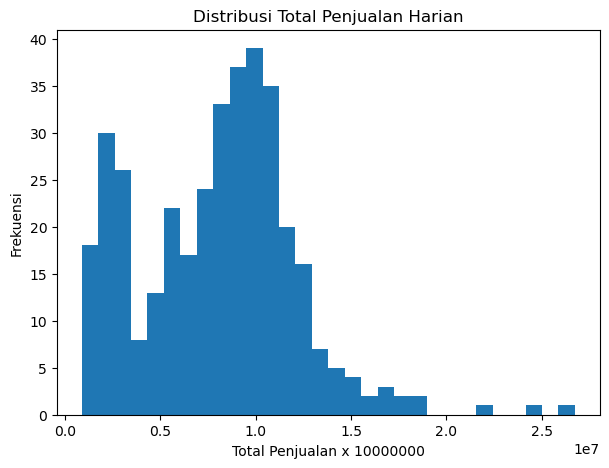

In [128]:
plt.figure(figsize=(7,5))
plt.hist(df["Total Penjualan (IDR)"], bins=30)
plt.title("Distribusi Total Penjualan Harian")
plt.xlabel("Total Penjualan x 10000000")
plt.ylabel("Frekuensi")
plt.show()

Berdasarkan perhitungan central tendency pada column total penjualan, menunjukkan rata-ratanya sebesar Rp. 7.993.633 dan nilai mediannya sebesar Rp.8.423.327 hal ini menunjukkan adanya total penjualan yang rendah dibandingkan dengan mayoritasnya sehingga menurunkan nilai meannya, dari nilai skewnessnya sebesar 0,46 (<0,5)menandakan bahwa distribusi datanya masih simetris (normal) namun sedikit miring ke kiri dan nilai kurtosisnya sebsar 1,12 (> 1) yang menandakan bahwa data berbentuk leptokurtic yang menunjukkan adanya extreme value diantara total penjualan, hal ini menandakan adanya fluktuasi atau kenaikan penjualan yang signifikan yang terjadi saat adanya event besar dari platform e-commerce ataupun ada promosi dari toko. Dari grafik distribusi total penjualan harian menunjukkan distribusinya miring ke kiri dan adanya sedikit outlier, namun outlier tidak akan dihilangkan, dikarenakan data berasal dari nilai riil dan dapat nilai yang signifikan tinggi tersebut berasal dari adanya strategi promosi dari toko ataupun e-commerce, yang dapat dilihat nilai tertinggi tersebut berada pada tanggal kembar (1-1, 2-2, 3-3 dan seterusnya) yang memberikan banyak promo

In [129]:
print('Rata-rata produk diklik tahun 2024 :', df['Produk Diklik'].mean())
print('Median pada produk diklik pada tahun 2024 :', df['Produk Diklik'].median())
print('Skewness :', df['Produk Diklik'].skew())
print('Kurtosis :', df['Produk Diklik'].kurt())
print('Standar Deviasi :', df['Produk Diklik'].std())
print('Range produk diklik pada tahun 2024:',df['Produk Diklik'].max() - df['Produk Diklik'].min())

Rata-rata produk diklik tahun 2024 : 8179.5901639344265
Median pada produk diklik pada tahun 2024 : 8798.5
Skewness : -0.11652303437107742
Kurtosis : -0.7903066958561373
Standar Deviasi : 3595.2890662546706
Range produk diklik pada tahun 2024: 14997


Berdasarkan perhitungan central tendency pada column pengunjung menunjukkan rata-rata produk diklik sebanyak 8179 kali dan nilai mediannya sebesar 8798 kali, hasil tersebut menunjukan bahwa ada hari dimana pengunjung yang sedikit sehingga menurunkan nilai meannya, namun dari nilai skewnessnya hanya menunjukkan -0,11 yang mengindikasikan bahwa data terdistribusi normal dan nilai kurtosisnya berbentuk platykurtic dengan nilai -0,79 yang menandakan bahwa hanya sedikit nilai extreme, dari perhitungan ini dapat memberikan sebuah insight bahwa trafik produk diklik stabil

In [130]:
print('Rata-rata Pembeli Baru 2024 :', df['Total Pembeli Baru'].mean())
print('Rata-rata Pembeli Lama 2024 :', df['Total Pembeli Saat Ini'].mean())
print(f'Pembeli baru sebesar {df['Total Pembeli Baru'].mean()/df['Pembeli'].mean()}')

Rata-rata Pembeli Baru 2024 : 41.02732240437158
Rata-rata Pembeli Lama 2024 : 3.289617486338798
Pembeli baru sebesar 0.92577065351418


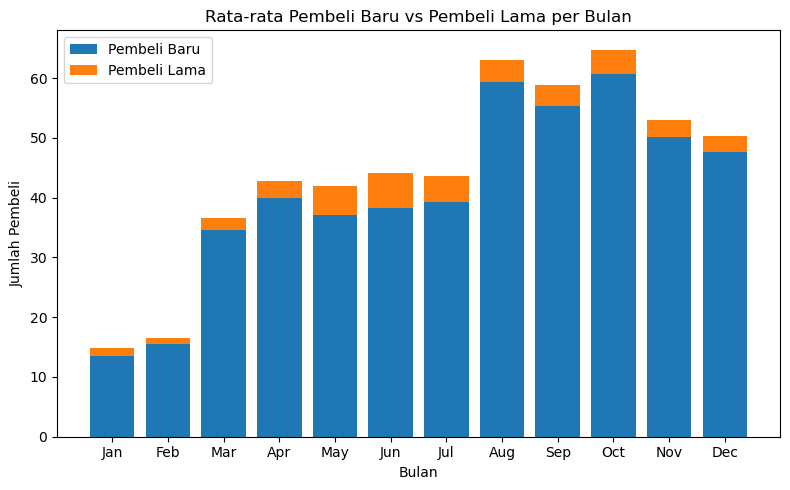

In [131]:
avg_new = df.groupby("Bulan")["Total Pembeli Baru"].mean().reindex(bulan_order, fill_value=0)
avg_exist = df.groupby("Bulan")["Total Pembeli Saat Ini"].mean().reindex(bulan_order, fill_value=0)

plt.figure(figsize=(8,5))
plt.bar(avg_new.index, avg_new, label="Pembeli Baru")
plt.bar(avg_exist.index, avg_exist, bottom=avg_new, label="Pembeli Lama")
plt.title("Rata-rata Pembeli Baru vs Pembeli Lama per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pembeli")
plt.legend()
plt.tight_layout()
plt.show()

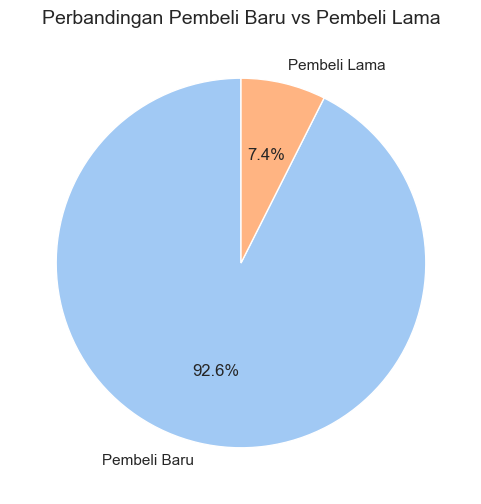

In [136]:
total_pembeli = [df['Total Pembeli Baru'].sum(), df['Total Pembeli Saat Ini'].sum()]
labels = ['Pembeli Baru', 'Pembeli Lama']

# Atur style Seaborn
sns.set(style="whitegrid")

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(total_pembeli, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("pastel"))

plt.title('Perbandingan Pembeli Baru vs Pembeli Lama', fontsize=14)
plt.show()

Dapat dilihat dari perhitungan rata-rata pembeli, data menunjukkan bahwa pembeli pada toko Formee mayoritas merupakan pembeli baru sebesar 93%, sehingga potensi penjualan masih sangat besar jika dapat menaikan retensi pembeli (pembelian berulang)

In [132]:
corr_r, pval_p = stats.pearsonr(df['Produk Diklik'], df['Total Penjualan (IDR)'])
corr_rho, pval_s = stats.spearmanr(df['Produk Diklik'], df['Total Penjualan (IDR)'])
corr_tau, pval_k = stats.kendalltau(df['Produk Diklik'], df['Total Penjualan (IDR)'])

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation: 0.82, p-value: 1.2658614072991973e-88
rho-correlation: 0.78, p-value: 7.574620865105672e-75
tau-correlation: 0.59, p-value: 7.253479986521193e-64


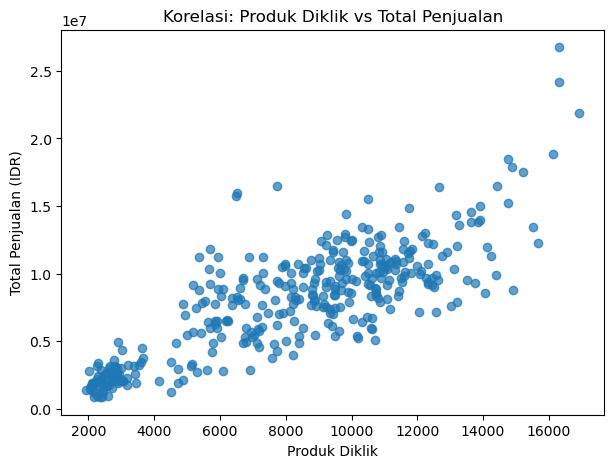

In [133]:
plt.figure(figsize=(7,5))
plt.scatter(df["Produk Diklik"], df["Total Penjualan (IDR)"], alpha=0.7)
plt.title("Korelasi: Produk Diklik vs Total Penjualan")
plt.xlabel("Produk Diklik")
plt.ylabel("Total Penjualan (IDR)")
plt.show()

Dari uji korelasi menggunakan metode pearson, spearman dan kendall menunjukkan hubungan positif antara produk diklik dengan total penjualan yang berarti setiap peningkatan jumlah produk diklik hampir selalu diikuti oleh peningkatan total penjualan dengan p-value yang mendekati 0 menunjukkan hasil yang sangat signifikan dan kecil kemungkinan hal ini terjadi secara kebetulan. Sehingga dibutuhkan sebuah strategi untuk meningkatkan jumlah trafik (produk diklik) agar mendapatkan total penjualan yang lebih tinggi.

In [134]:
print('Rata-rata konversi pesanan tahun 2024 :', df['Tingkat Konversi Pesanan'].mean())
print('Median pada total penjualan pada tahun 2024 :', df['Tingkat Konversi Pesanan'].median())
print('Skewness :', df['Tingkat Konversi Pesanan'].skew())
print('Kurtosis :', df['Tingkat Konversi Pesanan'].kurt())
print('Variance :', df['Tingkat Konversi Pesanan'].var())
print('Standar Deviasi :', df['Tingkat Konversi Pesanan'].std())
print('Range total penjualan pada tahun 2024:',df['Tingkat Konversi Pesanan'].max() - df['Tingkat Konversi Pesanan'].min())

Rata-rata konversi pesanan tahun 2024 : 0.005710655737704917
Median pada total penjualan pada tahun 2024 : 0.0055000000000000005
Skewness : 1.0957331140552569
Kurtosis : 3.032135316376305
Variance : 3.150160116775208e-06
Standar Deviasi : 0.0017748690421479575
Range total penjualan pada tahun 2024: 0.012899999999999998


Rata-rata konversi pesanan menunjukkan angka 0,57%, nilai ini sangat kecil untuk toko yang dijual pada e-commerce Shopee, yang direkomendasikan untuk konversi pesanan dari total produk diklik adalah sebesar 2%, sehingga peningkatan pada total penjualan masih sangat besar

## Statistik Inferensial

Untuk meningkatkan total penjualan pada toko formee, dilakukan sebuah analisis untuk menentukan sebuah campaign promosi dengan mencari tahu apakah ada hubungan antara total produk diklik hingga menjadi pembelian (tingkat konversi), melihat tingkat konversi pembelian pada toko formee masih cukup renda (0,57%) sehingga perhitungan dilakukan dengan menguji apakah tingkat konversi pesanan berbeda signifikan diantara hari yang memiliki aktivitas tinggi dan aktivitas rendah dengan menggunakan Independent Two-Sample Test

Berikut penjabaran Hipotesisnya

- μ1 = μ2
- μ1 ≠ μ2

- H0 = tidak ada perbedaan signifikan antara high activity dan low activity
- H1 = ada perbedaan siginifikan antara high activity dan low activity

In [135]:
# Membagi kelompok high activity dan low activity
median_orders = df["Total Pesanan"].median()
high_activity = df[df["Total Pesanan"] > median_orders]
low_activity = df[df["Total Pesanan"] <= median_orders]

t_stat, p_val = stats.ttest_ind(
    high_activity["Tingkat Konversi Pesanan"],
    low_activity["Tingkat Konversi Pesanan"],
    equal_var=False)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

T-Statistic: 5.259996745904577
P-Value: 2.4775417953026994e-07


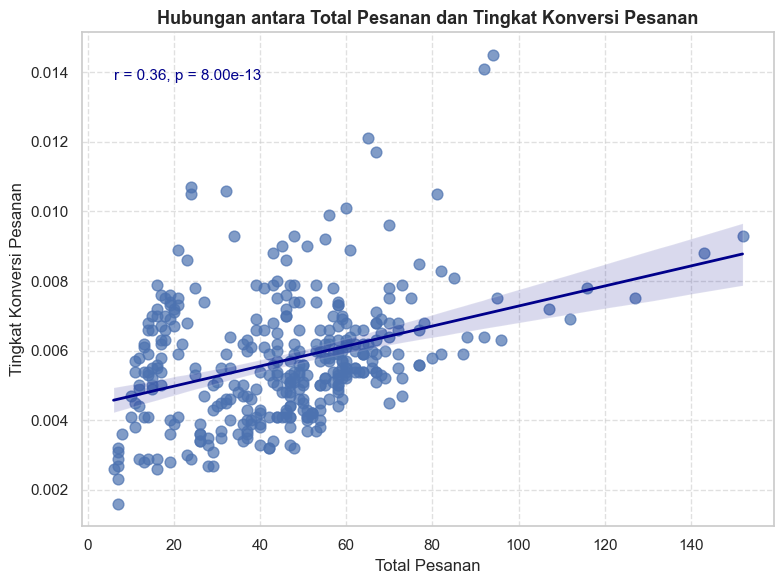

In [140]:
corr, p_val = stats.pearsonr(df["Total Pesanan"], df["Tingkat Konversi Pesanan"])

plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x="Total Pesanan",
    y="Tingkat Konversi Pesanan",
    scatter_kws={"alpha":0.7, "s":60},
    line_kws={"color":"darkblue", "linewidth":2}
)

plt.title("Hubungan antara Total Pesanan dan Tingkat Konversi Pesanan",
          fontsize=13, weight='bold')
plt.xlabel("Total Pesanan")
plt.ylabel("Tingkat Konversi Pesanan")
plt.grid(True, linestyle="--", alpha=0.6)

plt.text(
    df["Total Pesanan"].min(),
    df["Tingkat Konversi Pesanan"].max() * 0.95,
    f"r = {corr:.2f}, p = {p_val:.2e}",
    fontsize=11,
    color="darkblue"
)

plt.tight_layout()
plt.show()


Dari perhitungan dengan menggunakan Independent Two-Sample Test menunjukkan nilai P-value < 0,05 sehigga H0 ditolak, yang berarti ada perbedaan signifikan antara hari ramai dan sepi, sehingga jumlah pengunjung berpengaruh signifikan juga terhadap total pendapatan dan memiliki hubungan positif kuat. Saran yang dapat diberikan kepada toko adalah dengan meningkatkan kepercayaan pelanggan dengan meperlihatkan aktivitas toko

# vi. Conclusion

Berdasarkan hasil analisis dengan metode deskriptif dan inferensial dapat disimpulkan bahwa aktivitas toko yang dapat dilihat dari produk diklik dan pesanan berpengaruh signifikan terhadap tingkat konversi dan total penjualan. Penjualan pada toko memiliki pola yang fluktuatif namun cenderung bernilai positif dengan konversi pesanan dan pembeli berulang yang masih rendah merupakan peluang untuk meningkatkan total pendapatan melalui strategi promosi, retensi pelanggan dan optimalisasi trafik toko.